## MINIMUM SPINNING TREE
### - Prim
### - Djikstra,
### - Sollin
### - Kruskal

- Nama : Hafizh Hilman Asyhari
- NIM : 202331206
- Kelas : D
- Fakultas : Fakultas Telematika Energi
- Mata Kuliah : Analisis Algoritma
- Dosen : Bapak M Yoga Distra Sudirman, S.T., MTI
- Tahun : 2025
- Negara : Indonesia

In [1]:
# ===============================
# 1. IMPORT LIBRARY
# ===============================
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import time
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# ===============================
# 2. DATA DARI NIM 202331206
# ===============================
a, b, c, d, e = 20, 23, 3, 12, 6

edges = [
    ("A", "B", a),
    ("B", "C", b),
    ("A", "D", c),
    ("B", "D", d),
    ("B", "E", abs(d - e)),
    ("C", "E", abs(b - e)),
    ("D", "E", abs(d + b)),
    ("D", "F", e),
    ("E", "F", abs(c + e)),
    ("E", "G", abs(d - e - a)),
    ("F", "G", abs(c - e))
]

pos_fixed = {
    "A": (0, 2),
    "B": (2, 2.5),
    "C": (4, 3),
    "D": (1, 0),
    "E": (3, 1.5),
    "F": (2.5, -1),
    "G": (4, -1.2)
}

G = nx.Graph()
G.add_weighted_edges_from(edges)

In [3]:
# ===============================
# 3. FUNGSI STATISTIK MST
# ===============================
def get_mst_stats(name, edges, exec_time):
    total_weight = sum(G[u][v]['weight'] for u, v in edges)
    edge_count = len(edges)
    avg_weight = total_weight / edge_count if edge_count else 0
    return {
        "Algoritma": name,
        "Total Bobot": total_weight,
        "Jumlah Edge": edge_count,
        "Rata-rata Bobot": round(avg_weight, 2),
        "Waktu Eksekusi (s)": round(exec_time, 6)
    }

stats = []

In [4]:
# ===============================
# 4. MST KRUSKAL
# ===============================
start = time.time()
kruskal_mst = nx.minimum_spanning_tree(G, algorithm='kruskal')
kruskal_edges = list(kruskal_mst.edges())
end = time.time()
stats.append(get_mst_stats("Kruskal", kruskal_edges, end - start))

In [5]:
# ===============================
# 5. MST PRIM
# ===============================
start = time.time()
prim_mst = nx.minimum_spanning_tree(G, algorithm='prim')
prim_edges = list(prim_mst.edges())
end = time.time()
stats.append(get_mst_stats("Prim", prim_edges, end - start))

In [6]:
# ===============================
# 6. MST SOLLIN (BORUVKA)
# ===============================

start = time.time()  # Mencatat waktu mulai eksekusi algoritma

# Inisialisasi struktur union-find: setiap node adalah parent dirinya sendiri
parent = {n: n for n in G.nodes()}

# Inisialisasi rank (digunakan untuk optimasi union by rank)
rank = {n: 0 for n in G.nodes()}

# Fungsi find dengan path compression untuk menemukan root dari suatu node
def find(u):
    while parent[u] != u:
        parent[u] = parent[parent[u]]  # Kompresi path untuk efisiensi
        u = parent[u]
    return u

# Fungsi union untuk menggabungkan dua set, menggunakan rank
def union(u, v):
    u_root, v_root = find(u), find(v)
    if u_root == v_root: return  # Jika sudah satu set, tidak perlu digabung
    if rank[u_root] < rank[v_root]:
        parent[u_root] = v_root  # Gabung u ke v jika rank v lebih tinggi
    else:
        parent[v_root] = u_root  # Gabung v ke u jika rank u lebih tinggi atau sama
        if rank[u_root] == rank[v_root]:
            rank[u_root] += 1  # Tingkatkan rank jika kedua rank sama

sollin_edges = []  # Menyimpan edge hasil MST algoritma Sollin

# Iterasi hingga seluruh node tergabung dalam satu komponen
while len(set(find(n) for n in G.nodes())) > 1:
    cheapest = {}  # Menyimpan edge termurah dari tiap komponen

    # Iterasi semua edge di graf
    for u, v, data in G.edges(data=True):
        ru, rv = find(u), find(v)  # Temukan root dari masing-masing node
        if ru != rv:
            # Cek dan update edge termurah untuk komponen ru
            if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                cheapest[ru] = (u, v)
            # Cek dan update edge termurah untuk komponen rv
            if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                cheapest[rv] = (u, v)

    # Tambahkan edge termurah ke MST jika node-nya dari komponen berbeda
    for u, v in set(cheapest.values()):
        if find(u) != find(v):
            union(u, v)  # Gabungkan komponen
            sollin_edges.append((u, v))  # Simpan edge ke MST

end = time.time()  # Mencatat waktu akhir eksekusi

# Simpan statistik performa algoritma Sollin
stats.append(get_mst_stats("Sollin", sollin_edges, end - start))

In [7]:
# ===============================
# 7. DIJKSTRA
# ===============================

start = time.time()  # Merekam waktu sebelum proses eksekusi algoritma dimulai

# Menggunakan fungsi dari NetworkX untuk menghitung semua jalur terpendek dari node "A"
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")

# Menyimpan semua edge yang dilewati oleh jalur terpendek dari A ke semua node
# Daftar ini digunakan untuk keperluan visualisasi dan statistik

# Inisialisasi list kosong untuk menampung semua edge pada rute terpendek
# dari A ke semua node lainnya
dijkstra_edges = []

# Iterasi setiap simpul tujuan (destinasi) dalam hasil path Dijkstra
for dest in dijkstra_path:
    path = dijkstra_path[dest]  # Ambil daftar simpul dalam jalur dari A ke simpul 'dest'
    dijkstra_edges += list(zip(path[:-1], path[1:]))  # Tambahkan semua pasangan edge ke dalam list

end = time.time()  # Merekam waktu setelah proses algoritma selesai

# Menambahkan statistik performa algoritma Dijkstra ke dalam list `stats`
# Statistik mencakup: total bobot jalur, jumlah edge, rata-rata bobot, dan waktu eksekusi
stats.append(get_mst_stats("Dijkstra", dijkstra_edges, end - start))

In [27]:
# ===============================
# ANIMASI MST
# ===============================
def animate_mst_building_interactive(G, mst_edges, pos, color="green", title="Animasi MST"):
    # Membuat objek figure dan axes untuk plot
    fig, ax = plt.subplots(figsize=(6, 4))

    # Mengambil label bobot dari edge pada graf G
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        # Membersihkan canvas axes
        ax.clear()

        # Menggambar semua simpul (nodes) dengan warna biru muda
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightblue', node_size=800)

        # Menambahkan label pada setiap simpul
        nx.draw_networkx_labels(G, pos, ax=ax)

        # Menggambar semua edge sebagai garis putus-putus berwarna abu-abu (belum MST)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')

        # Menambahkan label bobot pada setiap edge
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

        # Menambahkan judul dan grid
        ax.set_title(title)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        # Memanggil fungsi untuk menggambar ulang graf dasar
        draw_base()

        # Menggambar edge MST dari indeks 0 hingga i saat ini
        nx.draw_networkx_edges(G, pos, edgelist=mst_edges[:i+1], edge_color=color, width=2.5, ax=ax)

        # Menampilkan progres animasi dengan update judul
        ax.set_title(f"{title} - Edge ke-{i+1} / {len(mst_edges)}")
        return ax,

    # Membuat animasi menggunakan matplotlib FuncAnimation
    ani = animation.FuncAnimation(fig, update, frames=len(mst_edges), interval=1000, repeat=False)

    # Menutup plot statis agar tidak muncul berbarengan dengan animasi
    plt.close(fig)

    # Mengembalikan animasi dalam format HTML interaktif
    return HTML(ani.to_jshtml())

In [9]:
def animate_sollin(G, pos, title="Animasi MST - Sollin"):
    parent = {n: n for n in G.nodes()}
    rank = {n: 0 for n in G.nodes()}

    def find(u):
        while parent[u] != u:
            parent[u] = parent[parent[u]]
            u = parent[u]
        return u

    def union(u, v):
        u_root, v_root = find(u), find(v)
        if u_root == v_root: return
        if rank[u_root] < rank[v_root]:
            parent[u_root] = v_root
        else:
            parent[v_root] = u_root
            if rank[u_root] == rank[v_root]:
                rank[u_root] += 1

    sollin_edges = []
    frames = []

    while len(set(find(n) for n in G.nodes())) > 1:
        cheapest = {}
        for u, v, data in G.edges(data=True):
            ru, rv = find(u), find(v)
            if ru != rv:
                if ru not in cheapest or data['weight'] < G[cheapest[ru][0]][cheapest[ru][1]]['weight']:
                    cheapest[ru] = (u, v)
                if rv not in cheapest or data['weight'] < G[cheapest[rv][0]][cheapest[rv][1]]['weight']:
                    cheapest[rv] = (u, v)
        newly_added = []
        for u, v in set(cheapest.values()):
            if find(u) != find(v):
                union(u, v)
                sollin_edges.append((u, v))
                newly_added.append((u, v))
        if newly_added:
            frames.append(sollin_edges.copy())

    fig, ax = plt.subplots(figsize=(6, 4))
    labels = nx.get_edge_attributes(G, 'weight')

    def draw_base():
        ax.clear()
        nx.draw_networkx_nodes(G, pos, ax=ax, node_color='lightgreen', node_size=800)
        nx.draw_networkx_labels(G, pos, ax=ax)
        nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray', style='dotted')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
        ax.grid(True)
        ax.set_axisbelow(True)

    def update(i):
        draw_base()
        nx.draw_networkx_edges(G, pos, edgelist=frames[i], edge_color='purple', width=3, ax=ax)
        ax.set_title(f"{title} - Iterasi {i+1} / {len(frames)}")
        return ax,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=1200, repeat=False)
    plt.close(fig)
    return HTML(ani.to_jshtml())


In [10]:
# KRUSKAL
kruskal_mst = list(nx.minimum_spanning_edges(G, algorithm='kruskal', data=True))
edges_kruskal = [(u, v) for u, v, _ in kruskal_mst]
display(animate_mst_building_interactive(G, edges_kruskal, pos_fixed, "green", "Kruskal"))

# PRIM
prim_mst = list(nx.minimum_spanning_edges(G, algorithm='prim', data=True))
edges_prim = [(u, v) for u, v, _ in prim_mst]
display(animate_mst_building_interactive(G, edges_prim, pos_fixed, "blue", "Prim"))

# DIJKSTRA
dijkstra_path = nx.single_source_dijkstra_path(G, source="A")
dijkstra_edges = []
for dest in dijkstra_path:
    path = dijkstra_path[dest]
    dijkstra_edges += list(zip(path[:-1], path[1:]))
display(animate_mst_building_interactive(G, dijkstra_edges, pos_fixed, "orange", "Dijkstra"))

# SOLLIN
display(animate_sollin(G, pos_fixed, title="Sollin (Boruvka)"))


In [11]:
# ===============================
# VISUALISASI TABEL STATISTIK
# ===============================
df_stats = pd.DataFrame(stats)
display(df_stats)

,Algoritma,Total Bobot,Jumlah Edge,Rata-rata Bobot,Waktu Eksekusi (s)
0,Kruskal,44,6,7.33,0.000000
1,Prim,44,6,7.33,0.000971
2,Sollin,44,6,7.33,0.001024
3,Dijkstra,92,15,6.13,0.000000


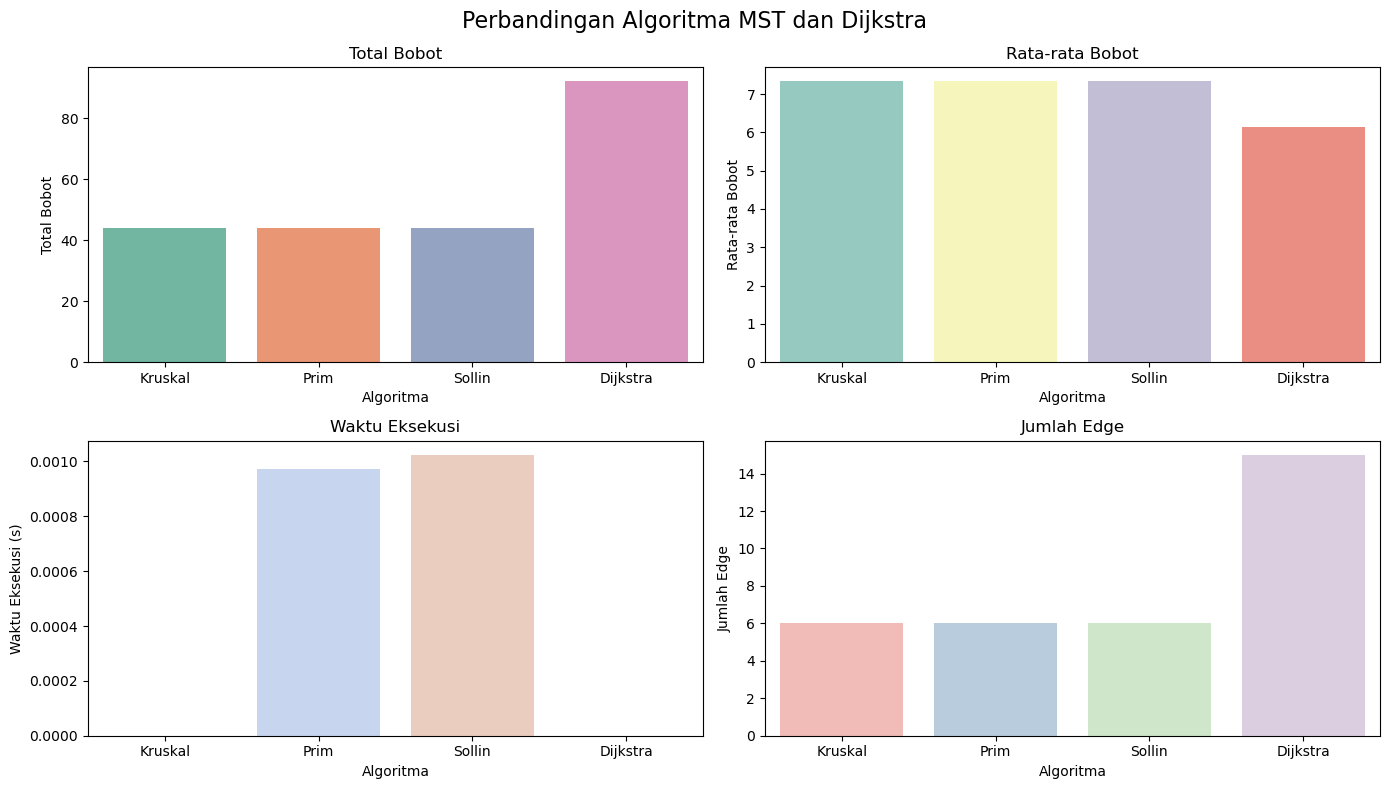

In [12]:
# ===============================
# VISUALISASI STATISTIK (Tanpa Warning)
# ===============================
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("Perbandingan Algoritma MST dan Dijkstra", fontsize=16)

sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", hue="Algoritma", ax=axes[0,0], legend=False, palette="Set2")
axes[0,0].set_title("Total Bobot")
sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", hue="Algoritma", ax=axes[0,1], legend=False, palette="Set3")
axes[0,1].set_title("Rata-rata Bobot")
sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", hue="Algoritma", ax=axes[1,0], legend=False, palette="coolwarm")
axes[1,0].set_title("Waktu Eksekusi")
sns.barplot(data=df_stats, x="Algoritma", y="Jumlah Edge", hue="Algoritma", ax=axes[1,1], legend=False, palette="Pastel1")
axes[1,1].set_title("Jumlah Edge")

plt.tight_layout()
plt.show()

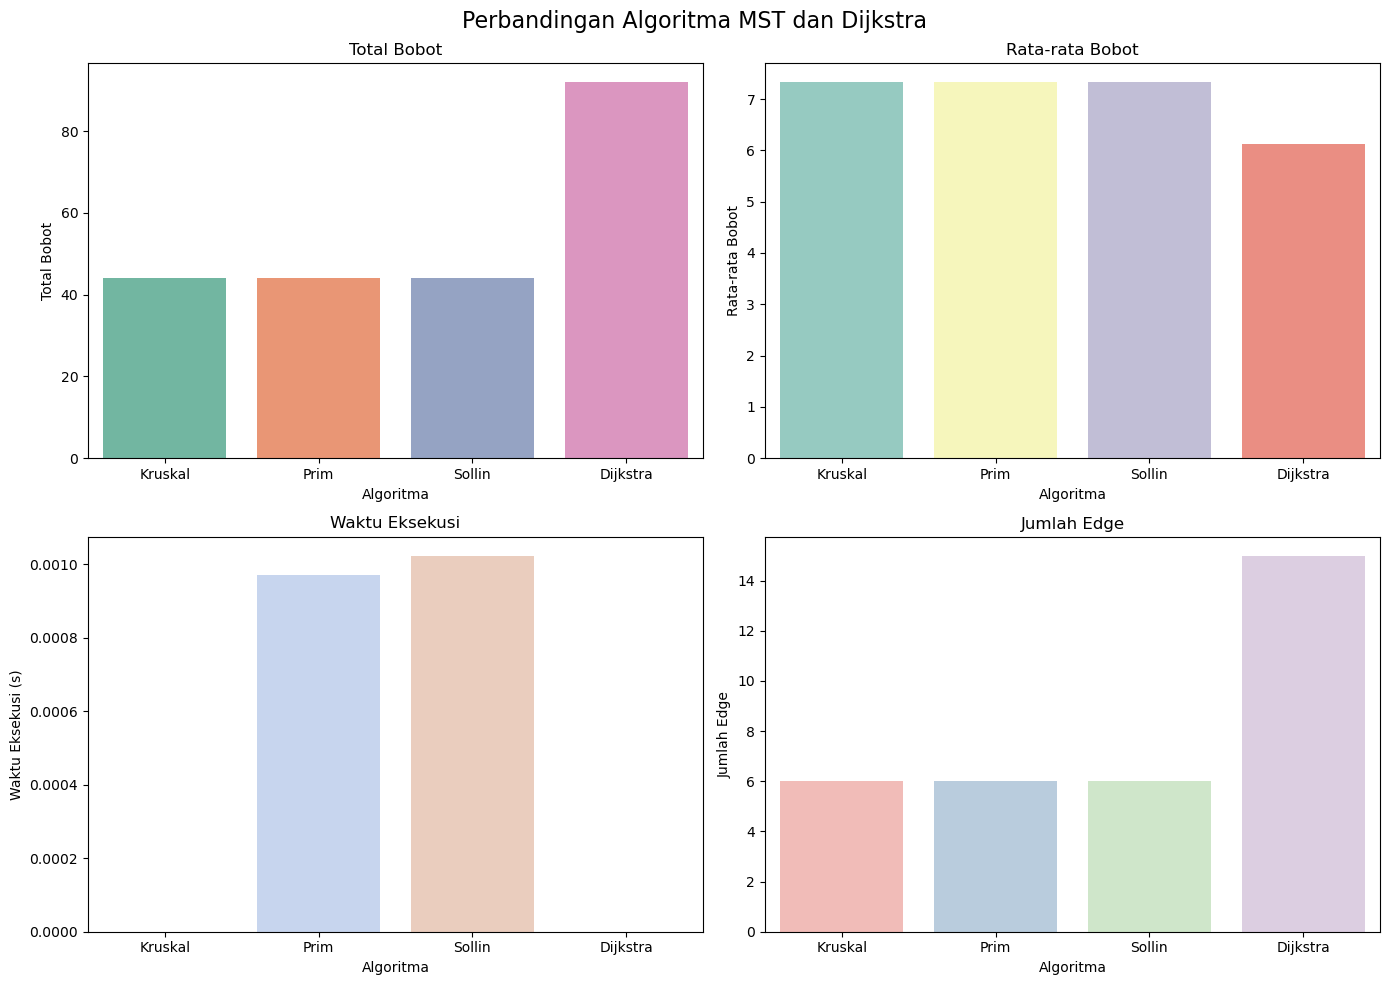

In [13]:
# --- VISUALISASI SEMUA DALAM SUBPLOT ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Perbandingan Algoritma MST dan Dijkstra", fontsize=16)


sns.barplot(data=df_stats, x="Algoritma", y="Total Bobot", hue="Algoritma", legend=False, ax=axes[0,0], palette="Set2")

axes[0,0].set_title("Total Bobot")

sns.barplot(data=df_stats, x="Algoritma", y="Rata-rata Bobot", hue="Algoritma", legend=False, ax=axes[0,1], palette="Set3")
axes[0,1].set_title("Rata-rata Bobot")

sns.barplot(data=df_stats, x="Algoritma", y="Waktu Eksekusi (s)", hue="Algoritma", legend=False, ax=axes[1,0], palette="coolwarm")
axes[1,0].set_title("Waktu Eksekusi")

sns.barplot(data=df_stats, x="Algoritma", y="Jumlah Edge", hue="Algoritma", legend=False, ax=axes[1,1], palette="Pastel1")
axes[1,1].set_title("Jumlah Edge")

plt.tight_layout()
plt.show()

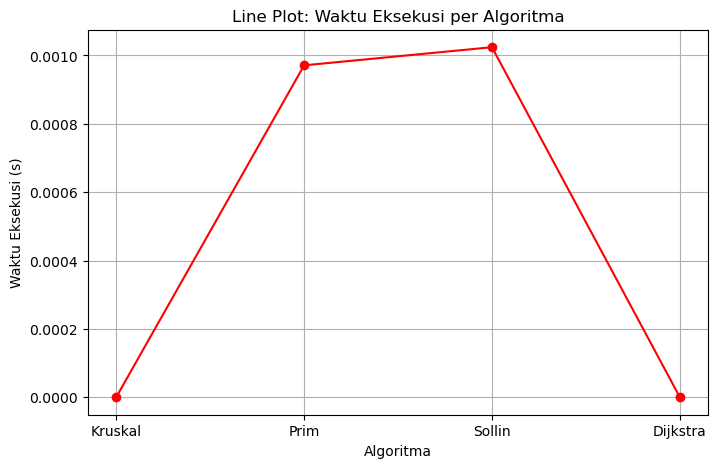

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(df_stats["Algoritma"], df_stats["Waktu Eksekusi (s)"], marker='o', color='red')
plt.title("Line Plot: Waktu Eksekusi per Algoritma")
plt.xlabel("Algoritma")
plt.ylabel("Waktu Eksekusi (s)")
plt.grid(True)
plt.show()


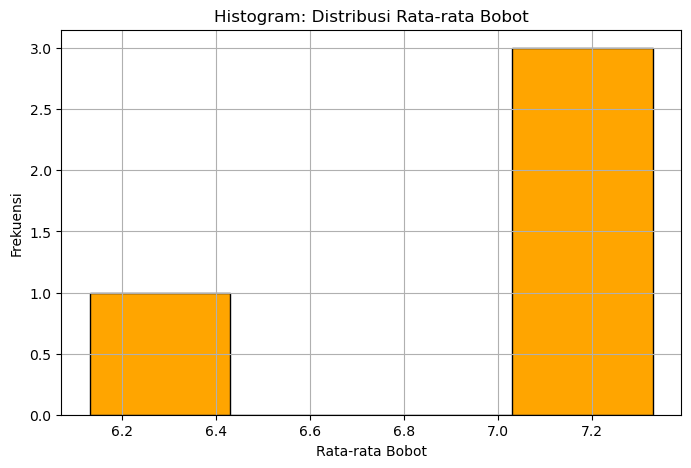

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df_stats["Rata-rata Bobot"], bins=4, color='orange', edgecolor='black')
plt.title("Histogram: Distribusi Rata-rata Bobot")
plt.xlabel("Rata-rata Bobot")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()


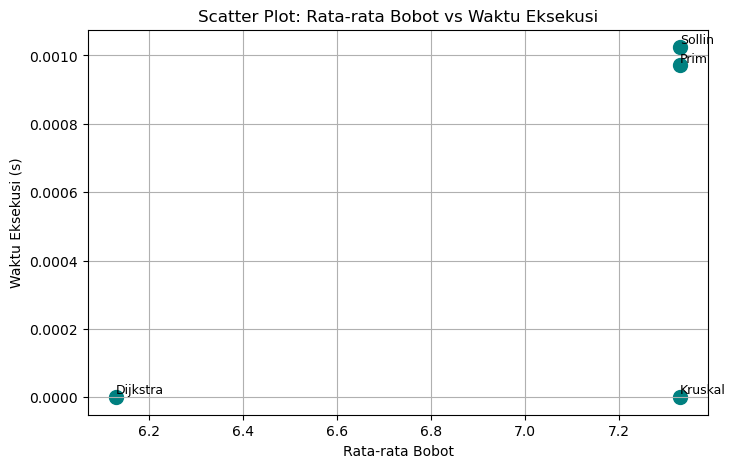

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(df_stats["Rata-rata Bobot"], df_stats["Waktu Eksekusi (s)"], s=100, c='teal')
for i, row in df_stats.iterrows():
    plt.text(row["Rata-rata Bobot"], row["Waktu Eksekusi (s)"] + 0.00001, row["Algoritma"], fontsize=9)
plt.title("Scatter Plot: Rata-rata Bobot vs Waktu Eksekusi")
plt.xlabel("Rata-rata Bobot")
plt.ylabel("Waktu Eksekusi (s)")
plt.grid(True)
plt.show()


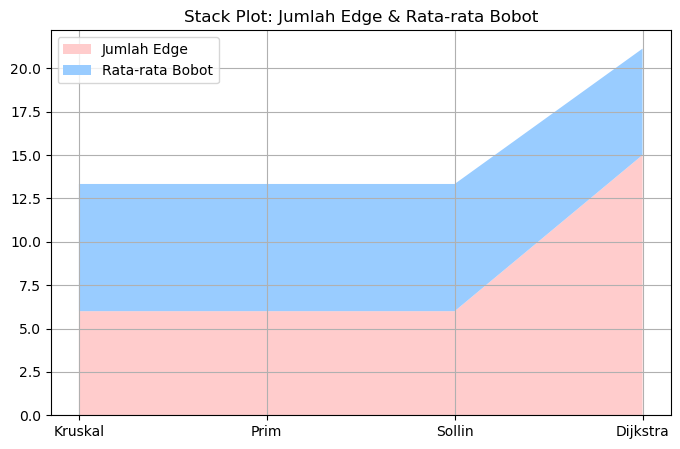

In [17]:
plt.figure(figsize=(8, 5))
plt.stackplot(df_stats["Algoritma"], 
              df_stats["Jumlah Edge"], 
              df_stats["Rata-rata Bobot"],
              labels=['Jumlah Edge', 'Rata-rata Bobot'],
              colors=['#ffcccc', '#99ccff'])
plt.title("Stack Plot: Jumlah Edge & Rata-rata Bobot")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


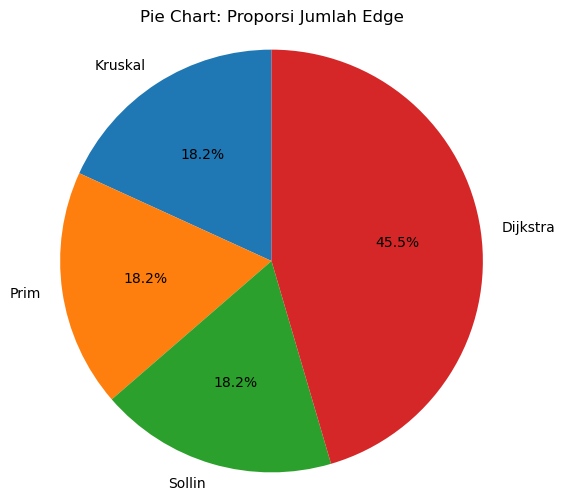

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(df_stats["Jumlah Edge"], labels=df_stats["Algoritma"], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart: Proporsi Jumlah Edge")
plt.axis('equal')
plt.show()


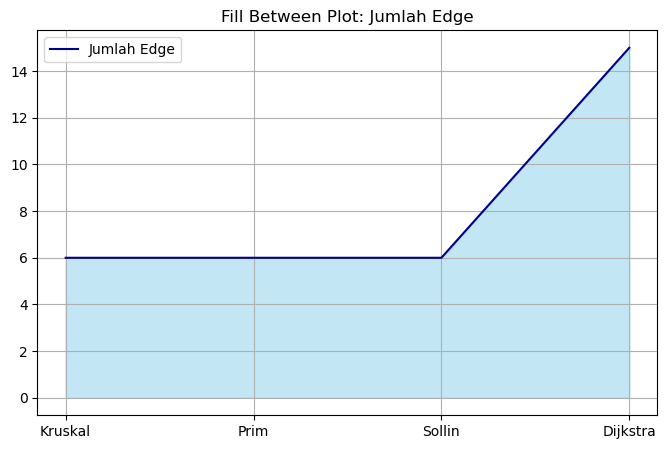

In [19]:
x = range(len(df_stats))
y = df_stats["Jumlah Edge"]

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Jumlah Edge', color='darkblue')
plt.fill_between(x, y, color='skyblue', alpha=0.5)
plt.xticks(ticks=x, labels=df_stats["Algoritma"])
plt.title("Fill Between Plot: Jumlah Edge")
plt.grid(True)
plt.legend()
plt.show()


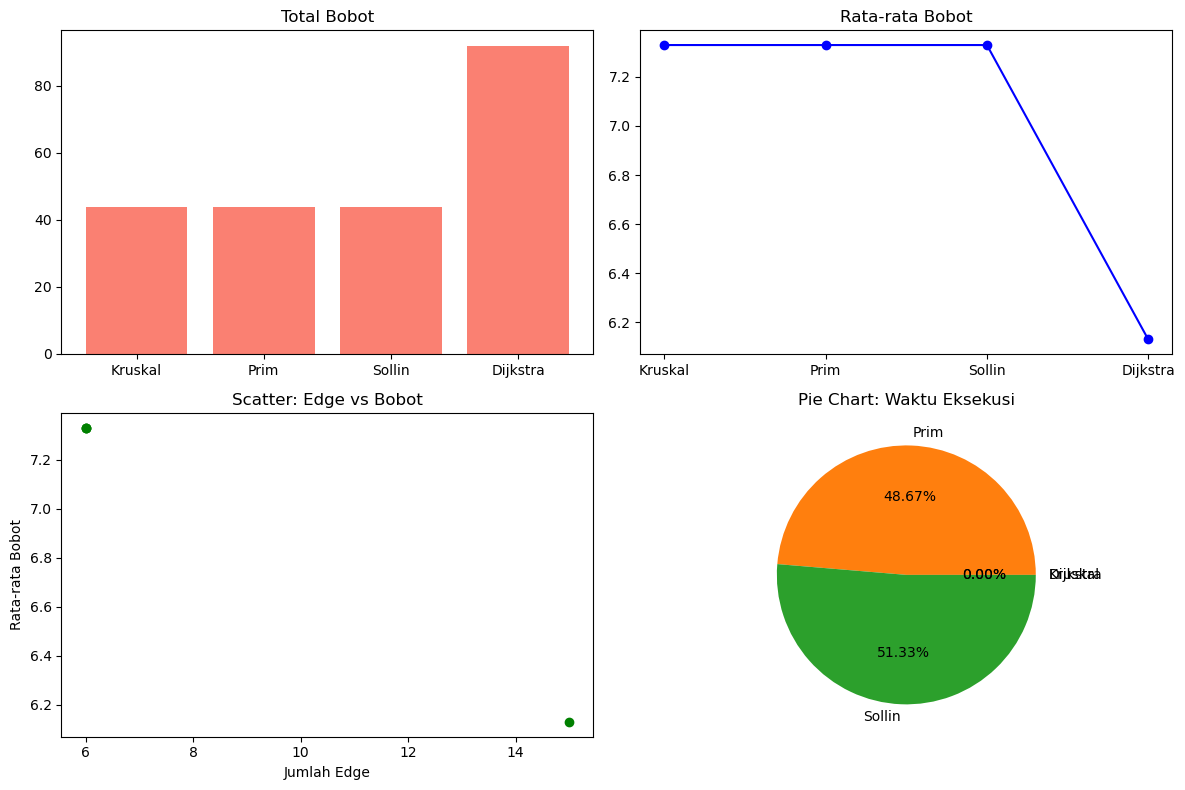

In [20]:
fig = plt.figure(figsize=(12, 8))

# Bar - Total Bobot
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1.bar(df_stats["Algoritma"], df_stats["Total Bobot"], color='salmon')
ax1.set_title("Total Bobot")

# Line - Rata-rata Bobot
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.plot(df_stats["Algoritma"], df_stats["Rata-rata Bobot"], marker='o', color='blue')
ax2.set_title("Rata-rata Bobot")

# Scatter - Jumlah Edge vs Rata-rata Bobot
ax3 = plt.subplot2grid((2, 2), (1, 0))
ax3.scatter(df_stats["Jumlah Edge"], df_stats["Rata-rata Bobot"], c='green')
ax3.set_xlabel("Jumlah Edge")
ax3.set_ylabel("Rata-rata Bobot")
ax3.set_title("Scatter: Edge vs Bobot")

# Pie - Waktu Eksekusi
ax4 = plt.subplot2grid((2, 2), (1, 1))
ax4.pie(df_stats["Waktu Eksekusi (s)"], labels=df_stats["Algoritma"], autopct='%1.2f%%')
ax4.set_title("Pie Chart: Waktu Eksekusi")

plt.tight_layout()
plt.show()


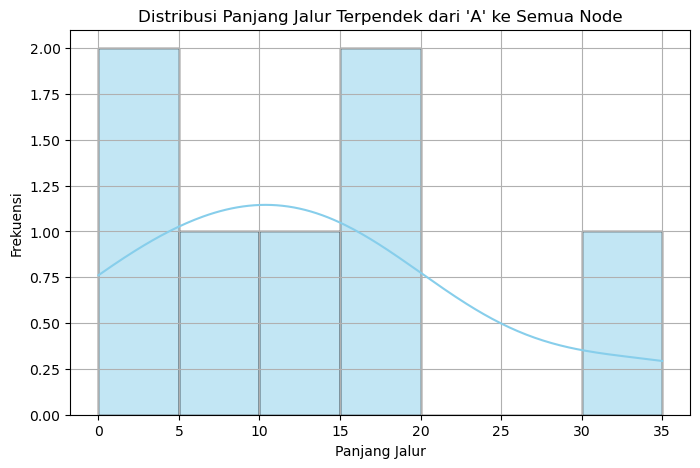

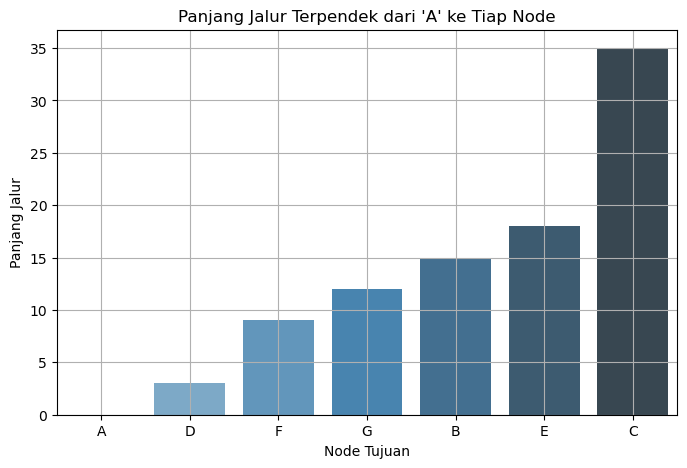

In [21]:
# Jalur terpendek dari node 'A' ke semua node lain menggunakan Dijkstra
source_node = 'A'
path_lengths = nx.single_source_dijkstra_path_length(G, source=source_node)

# Konversi ke DataFrame untuk analisis visual
df_path_lengths = pd.DataFrame(list(path_lengths.items()), columns=["Tujuan", "Panjang Jalur"])

# --- Histogram Distribusi Panjang Jalur ---
plt.figure(figsize=(8,5))
sns.histplot(df_path_lengths["Panjang Jalur"], bins=len(df_path_lengths), kde=True, color="skyblue", edgecolor="black")
plt.title(f"Distribusi Panjang Jalur Terpendek dari '{source_node}' ke Semua Node")
plt.xlabel("Panjang Jalur")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# --- Alternatif: Bar Plot Jalur Individu ---
plt.figure(figsize=(8,5))
sns.barplot(data=df_path_lengths, x="Tujuan", y="Panjang Jalur", hue="Tujuan", legend=False, palette="Blues_d")

plt.title(f"Panjang Jalur Terpendek dari '{source_node}' ke Tiap Node")
plt.xlabel("Node Tujuan")
plt.ylabel("Panjang Jalur")
plt.grid(True)
plt.show()

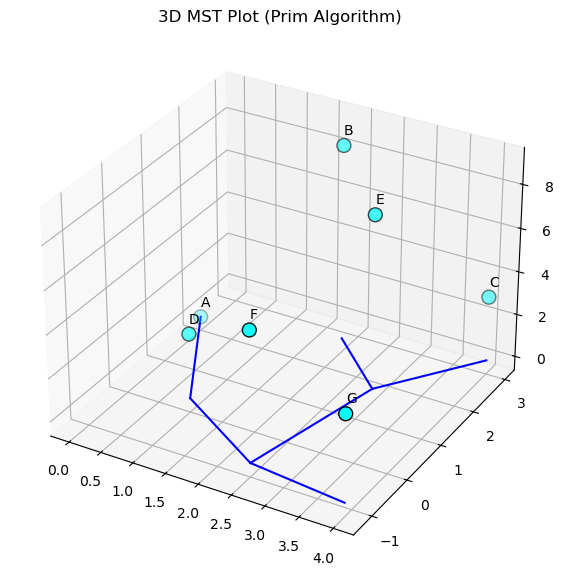

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Data posisi 3D dari pos_fixed
node_names = list(pos_fixed.keys())
xs = [pos_fixed[n][0] for n in node_names]
ys = [pos_fixed[n][1] for n in node_names]
zs = np.random.randint(0, 10, size=len(xs))  # nilai Z dibuat acak sebagai contoh

# Plot node
ax.scatter(xs, ys, zs, c='cyan', s=100, edgecolor='black')
for i, name in enumerate(node_names):
    ax.text(xs[i], ys[i], zs[i]+0.5, name, fontsize=10)

# Plot edge MST (misalnya dari Prim)
for u, v in edges_prim:
    x = [pos_fixed[u][0], pos_fixed[v][0]]
    y = [pos_fixed[u][1], pos_fixed[v][1]]
    z = [0, 0]  # bisa juga pakai nilai zs di atas
    ax.plot(x, y, z, c='blue')

ax.set_title("3D MST Plot (Prim Algorithm)")
plt.show()

3D Bar Plot

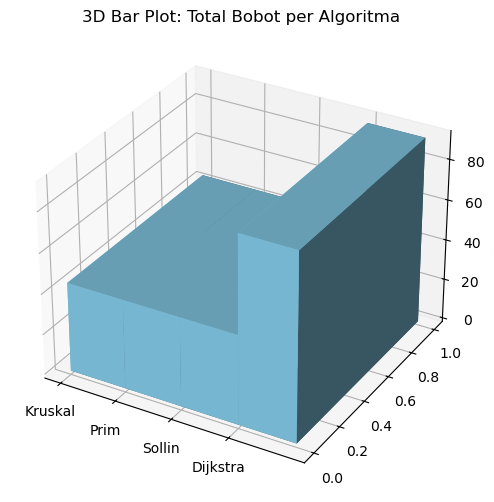

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x_pos = np.arange(len(df_stats))
y_pos = np.zeros_like(x_pos)
z_pos = np.zeros_like(x_pos)
dx = np.ones_like(x_pos)
dy = np.ones_like(x_pos)
dz = df_stats['Total Bobot']

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='skyblue')
ax.set_xticks(x_pos)
ax.set_xticklabels(df_stats['Algoritma'])
ax.set_title("3D Bar Plot: Total Bobot per Algoritma")
ax.set_zlabel("Total Bobot")
plt.show()


#### Wireframe Plot (Representasi Landscape Graph)

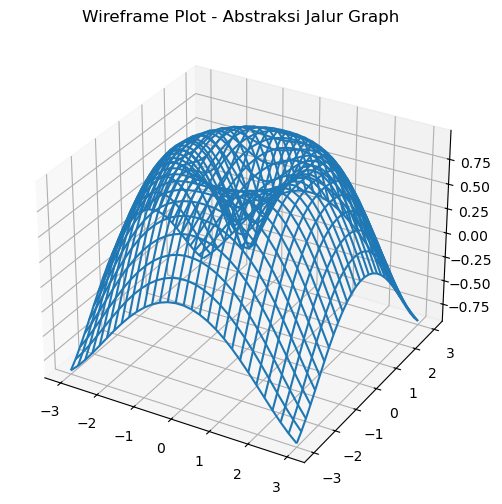

In [24]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Buat permukaan dummy (representasi abstrak)
X, Y = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
Z = np.sin(np.sqrt(X**2 + Y**2))

ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_title("Wireframe Plot - Abstraksi Jalur Graph")
plt.show()

#### Seaborn Pairplot / Heatmap untuk MST Stats

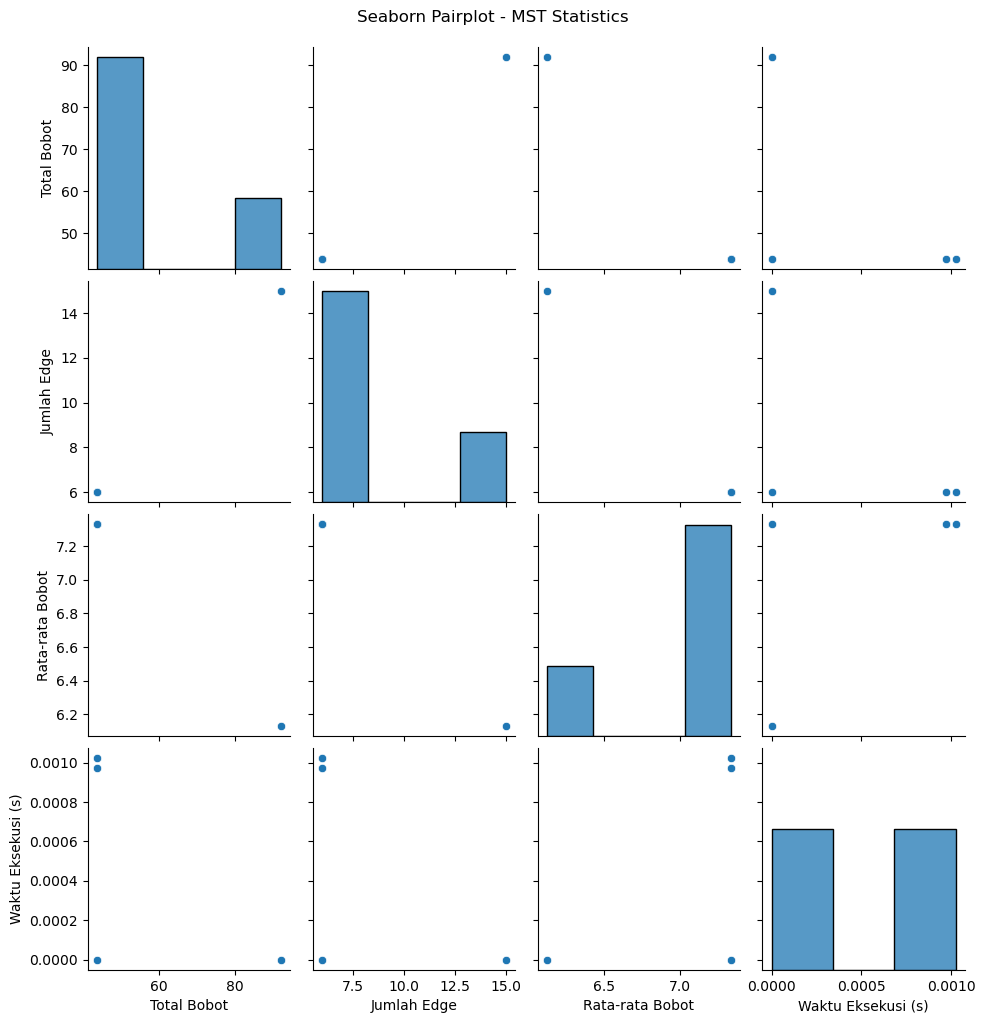

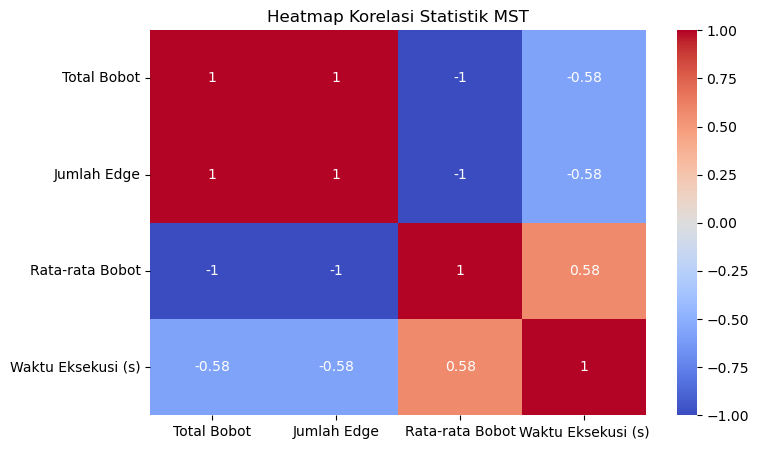

In [25]:
# Pairplot
sns.pairplot(df_stats.drop(columns=["Algoritma"]))
plt.suptitle("Seaborn Pairplot - MST Statistics", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_stats.drop(columns=["Algoritma"]).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Statistik MST")
plt.show()

In [26]:
# Altair Chart - Total Bobot
import altair as alt

chart = alt.Chart(df_stats).mark_bar().encode(
    x=alt.X('Algoritma:N', title='Algoritma'),
    y=alt.Y('Total Bobot:Q', title='Total Bobot'),
    color='Algoritma:N',
    tooltip=['Algoritma', 'Total Bobot']
).properties(
    title="Total Bobot MST per Algoritma",
    width=500,
    height=300
)
chart.interactive()

D:\SSD Menjalankan software\Data Scientist\Anaconda\Anaconda Install\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)